In [1]:
using Printf
using Random
using LinearAlgebra
using PlotlyJS
rng = MersenneTwister(18);

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-5270958815096437571\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-9479599404983639044\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-5270958815096437571\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
function pretty_print(v)
    @printf "["
    for i=1:length(v)
        @printf "%8.5f" v[i]
        if i < length(v)
            @printf "  "
        end
    end
    @printf "]\n"
end    

pretty_print (generic function with 1 method)

In [3]:
# Size of matrix
n = 3
X = rand(rng, n, n)
Λ = diagm(0 => Float32[2.0^(-i) for i=0:n-1])

A = X * Λ / X
Diagonal(Λ)

3×3 Diagonal{Float32,Array{Float32,1}}:
 1.0   ⋅    ⋅ 
  ⋅   0.5   ⋅ 
  ⋅    ⋅   0.25

In [4]:
x1 = X[:,1]
x1 /= norm(x1)
# Largest e-value: 1
# E-vector: x1

qk = randn(rng, n)
qk /= norm(qk)

niter = 20
err = zeros(niter)

for k=1:niter
    zk = A * qk          # Power iteration: multiply by A
    eval = dot(zk,qk)    # E-value approximation
    qk = zk/norm(zk)     # Normalize e-vector

    if k < 8 # We stop printing afterwards
        @printf "Iteration: %2d | e-value: %7.4f | qk, x1 =\n" k eval
        if (qk[1]*x1[1] < 0)
            qk = -qk
        end
        pretty_print(qk)
        pretty_print(x1)
    end
    err[k] = abs(Λ[1,1] - eval)
end

Iteration:  1 | e-value: -0.1974 | qk, x1 =
[ 0.61914   0.58831   0.52015]
[ 0.63141   0.63530   0.44466]
Iteration:  2 | e-value:  1.3476 | qk, x1 =
[ 0.63384   0.61352   0.47100]
[ 0.63141   0.63530   0.44466]
Iteration:  3 | e-value:  1.1011 | qk, x1 =
[ 0.63405   0.62437   0.45622]
[ 0.63141   0.63530   0.44466]
Iteration:  4 | e-value:  1.0394 | qk, x1 =
[ 0.63305   0.62979   0.45012]
[ 0.63141   0.63530   0.44466]
Iteration:  5 | e-value:  1.0174 | qk, x1 =
[ 0.63231   0.63253   0.44732]
[ 0.63141   0.63530   0.44466]
Iteration:  6 | e-value:  1.0082 | qk, x1 =
[ 0.63188   0.63391   0.44597]
[ 0.63141   0.63530   0.44466]
Iteration:  7 | e-value:  1.0040 | qk, x1 =
[ 0.63165   0.63460   0.44531]
[ 0.63141   0.63530   0.44466]


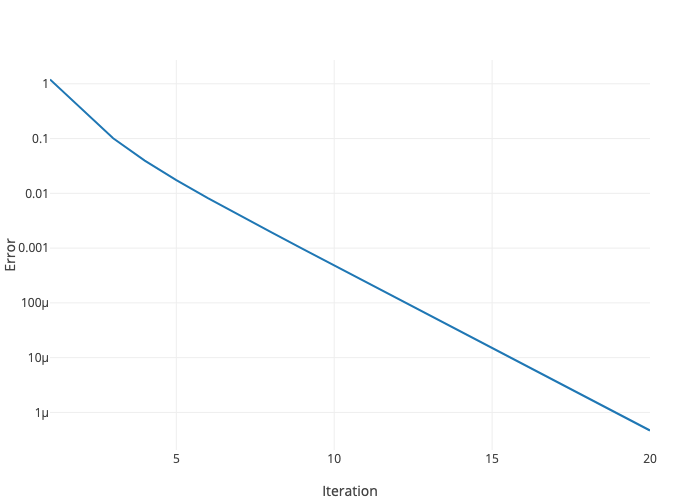

In [5]:
# Error in eigenvalue calculation
plot(err,Layout(yaxis_type="log",xaxis_title="Iteration",yaxis_title="Error",width=400))